In [1]:
!pip install pandas

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd

df_train = pd.read_csv('/content/drive/MyDrive/CI/depressed-people/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/CI/depressed-people/test.csv')
df_sample_data = pd.read_csv('/content/drive/MyDrive/CI/depressed-people/sample_submission.csv')

In [ ]:
df_train.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression,index
0,Male,33,2.0,4.0,Less than 5 hours,Unhealthy,Yes,12,4,Yes,Yes,171
1,Female,18,1.0,5.0,Less than 5 hours,Unhealthy,No,11,5,Yes,Yes,236
2,Female,22,1.0,1.0,Less than 5 hours,Healthy,No,2,2,No,No,36
3,Male,28,3.0,2.0,More than 8 hours,Healthy,No,3,1,Yes,No,430
4,Male,29,5.0,3.0,5-6 hours,Healthy,No,11,2,Yes,Yes,146


In [ ]:
df_train.columns

Index(['Gender', 'Age', 'Academic Pressure', 'Study Satisfaction',
       'Sleep Duration', 'Dietary Habits',
       'Have you ever had suicidal thoughts ?', 'Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression',
       'index'],
      dtype='object')

In [4]:
df_train.describe()

,Age,Academic Pressure,Study Satisfaction,Study Hours,Financial Stress,index
count,401.000000,401.000000,401.000000,401.000000,401.000000,401.000000
mean,26.281796,3.000000,3.089776,6.351621,2.927681,245.122195
std,4.852102,1.371131,1.380913,3.734107,1.416777,145.237848
min,18.000000,1.000000,1.000000,0.000000,1.000000,0.000000
25%,22.000000,2.000000,2.000000,3.000000,2.000000,121.000000
50%,27.000000,3.000000,3.000000,6.000000,3.000000,243.000000
75%,30.000000,4.000000,4.000000,10.000000,4.000000,370.000000
max,34.000000,5.000000,5.000000,12.000000,5.000000,501.000000


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401 entries, 0 to 400
Data columns (total 12 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Gender                                 401 non-null    object 
 1   Age                                    401 non-null    int64  
 2   Academic Pressure                      401 non-null    float64
 3   Study Satisfaction                     401 non-null    float64
 4   Sleep Duration                         401 non-null    object 
 5   Dietary Habits                         401 non-null    object 
 6   Have you ever had suicidal thoughts ?  401 non-null    object 
 7   Study Hours                            401 non-null    int64  
 8   Financial Stress                       401 non-null    int64  
 9   Family History of Mental Illness       401 non-null    object 
 10  Depression                             401 non-null    object 
 11  index 

In [ ]:
df_train.isnull().sum()

,0
Gender,0
Age,0
Academic Pressure,0
Study Satisfaction,0
Sleep Duration,0
Dietary Habits,0
Have you ever had suicidal thoughts ?,0
Study Hours,0
Financial Stress,0
Family History of Mental Illness,0


In [ ]:
df_train.duplicated().sum()

np.int64(0)

In [ ]:
df_train.drop('index', axis=1, inplace=True)

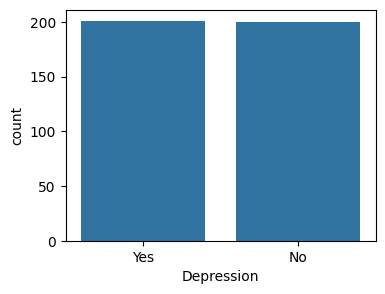

Depression
Yes    201
No     200
Name: count, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(4,3))
sns.countplot(data=df_train, x='Depression')
plt.show()
print(df_train['Depression'].value_counts())

In [ ]:
numerical_columns = df_train.select_dtypes(include=['int64', 'float64']).columns
categorical_columns = df_train.select_dtypes(include=['object']).columns

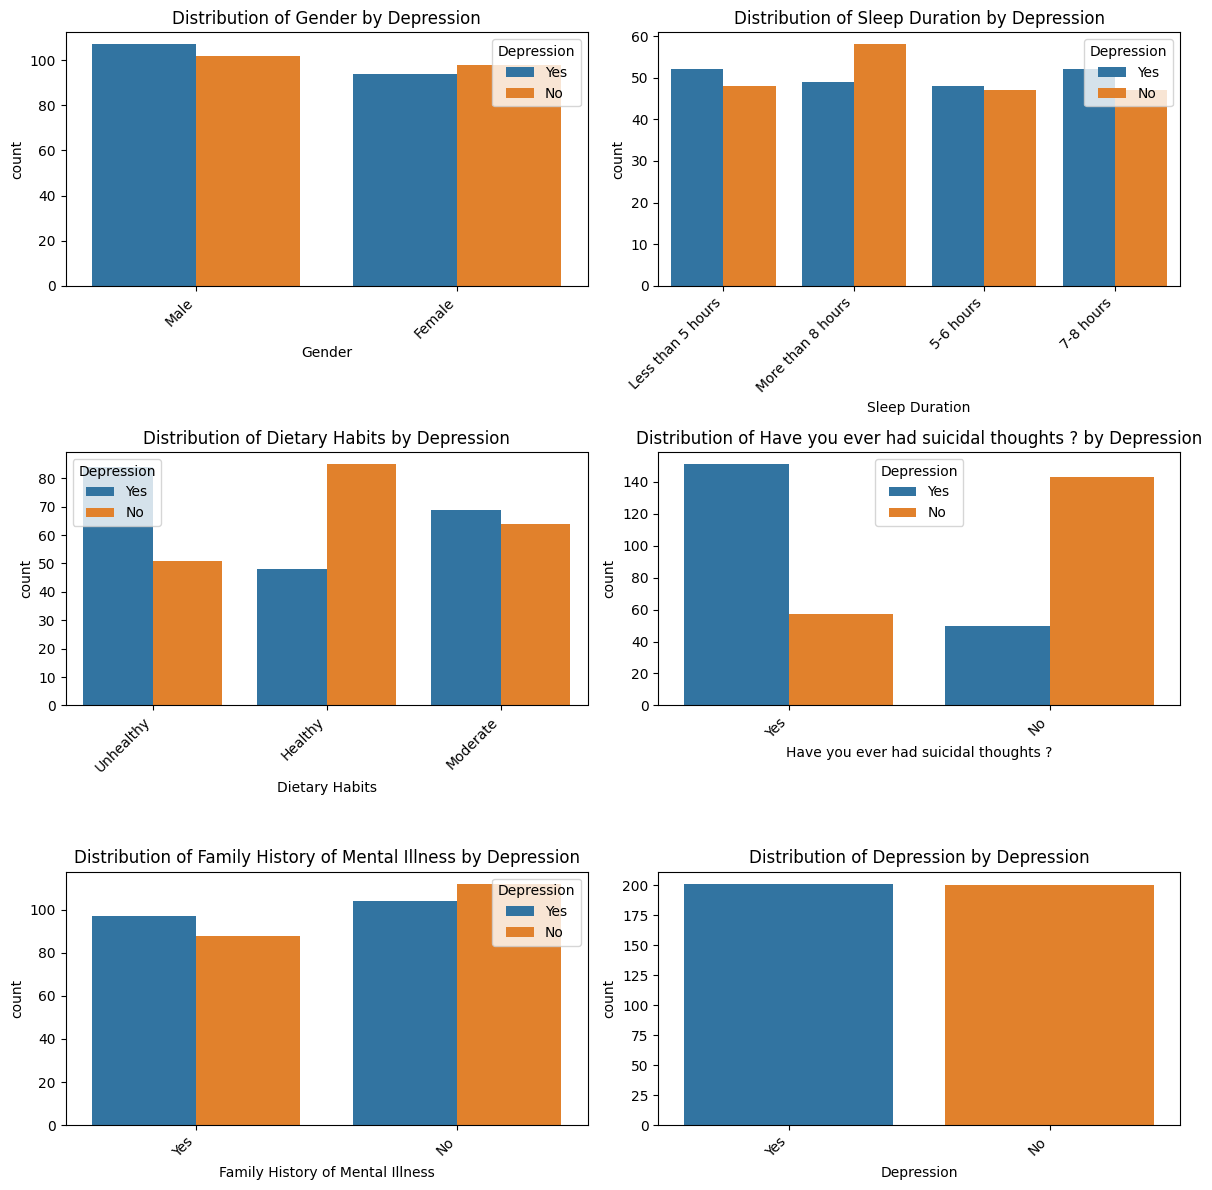

In [ ]:
n_cols = 2
n_rows = (len(categorical_columns) + n_cols - 1) // n_cols
plt.figure(figsize=(6 * n_cols, 4 * n_rows))
for i, col in enumerate(categorical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.countplot(data=df_train, x=col, hue='Depression')
    plt.title(f'Distribution of {col} by Depression')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig("categorical_distribution_by_depression.png", dpi=300, bbox_inches='tight')
plt.show()

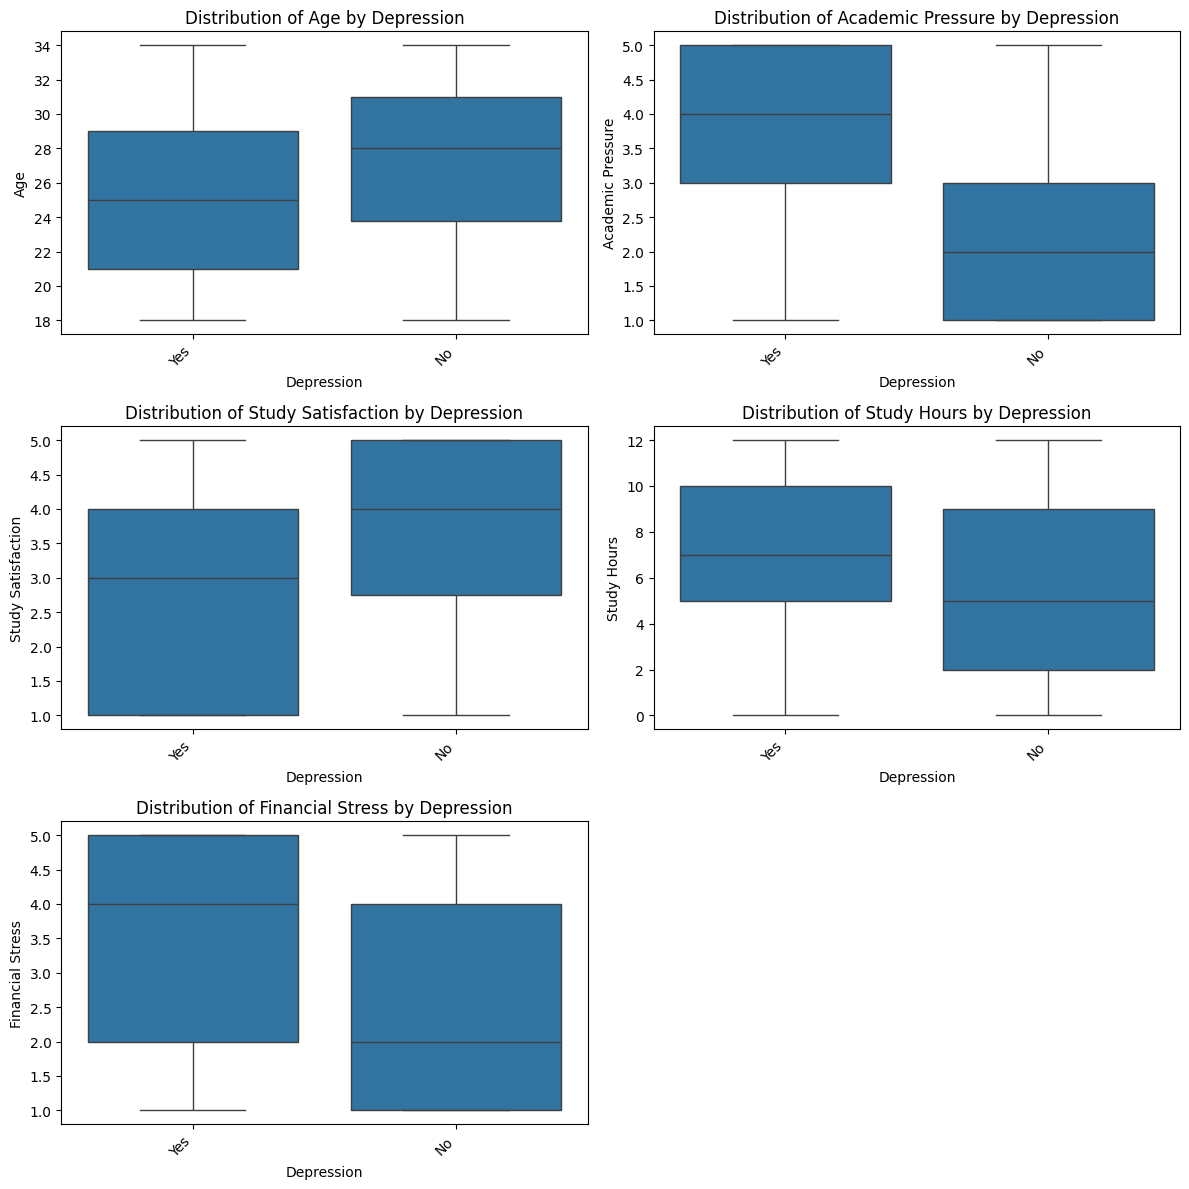

In [ ]:
n_cols = 2
n_rows = (len(numerical_columns) + n_cols - 1) // n_cols

plt.figure(figsize=(6 * n_cols, 4 * n_rows))

for i, col in enumerate(numerical_columns):
    plt.subplot(n_rows, n_cols, i + 1)
    sns.boxplot(data=df_train, x='Depression', y=col)
    plt.title(f'Distribution of {col} by Depression')
    plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.savefig("numerical_distribution_by_depression.png", dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
encoding_colums = ['Gender',
                   'Sleep Duration',
                   'Dietary Habits',
                   'Family History of Mental Illness',
                   'Have you ever had suicidal thoughts ?',
                   'Depression']

In [ ]:
for column in encoding_colums:
    print(f"Column: {column}")
    print(df_train[column].value_counts())
    print()

Column: Gender
Gender
Male      209
Female    192
Name: count, dtype: int64

Column: Sleep Duration
Sleep Duration
More than 8 hours    107
Less than 5 hours    100
7-8 hours             99
5-6 hours             95
Name: count, dtype: int64

Column: Dietary Habits
Dietary Habits
Unhealthy    135
Healthy      133
Moderate     133
Name: count, dtype: int64

Column: Family History of Mental Illness
Family History of Mental Illness
No     216
Yes    185
Name: count, dtype: int64

Column: Have you ever had suicidal thoughts ?
Have you ever had suicidal thoughts ?
Yes    208
No     193
Name: count, dtype: int64

Column: Depression
Depression
Yes    201
No     200
Name: count, dtype: int64



In [ ]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for column in encoding_colums:
    label_encoder = LabelEncoder()
    df_train[column] = label_encoder.fit_transform(df_train[column])
    encoders[column] = label_encoder
    print("Column: ", column)
    print("Classes: ", label_encoder.classes_)

    mapping = {label: idx for idx, label in enumerate(label_encoder.classes_)}
    print("Mapping (original → encoded):", mapping)

Column:  Gender
Classes:  ['Female' 'Male']
Mapping (original → encoded): {'Female': 0, 'Male': 1}
Column:  Sleep Duration
Classes:  ['5-6 hours' '7-8 hours' 'Less than 5 hours' 'More than 8 hours']
Mapping (original → encoded): {'5-6 hours': 0, '7-8 hours': 1, 'Less than 5 hours': 2, 'More than 8 hours': 3}
Column:  Dietary Habits
Classes:  ['Healthy' 'Moderate' 'Unhealthy']
Mapping (original → encoded): {'Healthy': 0, 'Moderate': 1, 'Unhealthy': 2}
Column:  Family History of Mental Illness
Classes:  ['No' 'Yes']
Mapping (original → encoded): {'No': 0, 'Yes': 1}
Column:  Have you ever had suicidal thoughts ?
Classes:  ['No' 'Yes']
Mapping (original → encoded): {'No': 0, 'Yes': 1}
Column:  Depression
Classes:  ['No' 'Yes']
Mapping (original → encoded): {'No': 0, 'Yes': 1}


In [ ]:
df_train.head()

,Gender,Age,Academic Pressure,Study Satisfaction,Sleep Duration,Dietary Habits,Have you ever had suicidal thoughts ?,Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33,2.0,4.0,2,2,1,12,4,1,1
1,0,18,1.0,5.0,2,2,0,11,5,1,1
2,0,22,1.0,1.0,2,0,0,2,2,0,0
3,1,28,3.0,2.0,3,0,0,3,1,1,0
4,1,29,5.0,3.0,0,0,0,11,2,1,1


In [ ]:
features = df_train.drop('Depression', axis=1)
targets = df_train['Depression']

In [ ]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size=0.2, random_state=42)

In [ ]:
!pip install xgboost lightgbm catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 8.4 MB/s eta 0:00:00


In [ ]:
def get_scores(test_targets, predictions):
    scores = {
        "Accuracy": accuracy_score(test_targets, predictions) * 100,
        "Precision": precision_score(test_targets, predictions) * 100,
        "Recall": recall_score(test_targets, predictions) * 100,
        "F1 Score": f1_score(test_targets, predictions) * 100
    }
    return scores

def add_scores_and_model_to_list(model_name, scores, results):
    results.append({
        "Model": model_name,
        "Accuracy": scores["Accuracy"],
        "Precision": scores["Precision"],
        "Recall": scores["Recall"],
        "F1 Score": scores["F1 Score"]
    })
    return results

def dispay_scores(results):
    scores_data_frame = pd.DataFrame(results)
    print("\nModel Performance Comparison:")
    print(scores_data_frame)
    return scores_data_frame

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'Naive Bayes': GaussianNB(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(verbose=0)
}

In [ ]:
results = []

for model_name, model in models.items():
    model.fit(train_features, train_targets)
    predictions = model.predict(test_features)
    scores = get_scores(test_targets, predictions)
    results = add_scores_and_model_to_list(model_name, scores, results)


model_evalutions_metrics = dispay_scores(results)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [19:18:42] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 159, number of negative: 161
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000163 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 62
[LightGBM] [Info] Number of data points in the train set: 320, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.496875 -> initscore=-0.012500
[LightGBM] [Info] Start training from score -0.012500
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: 

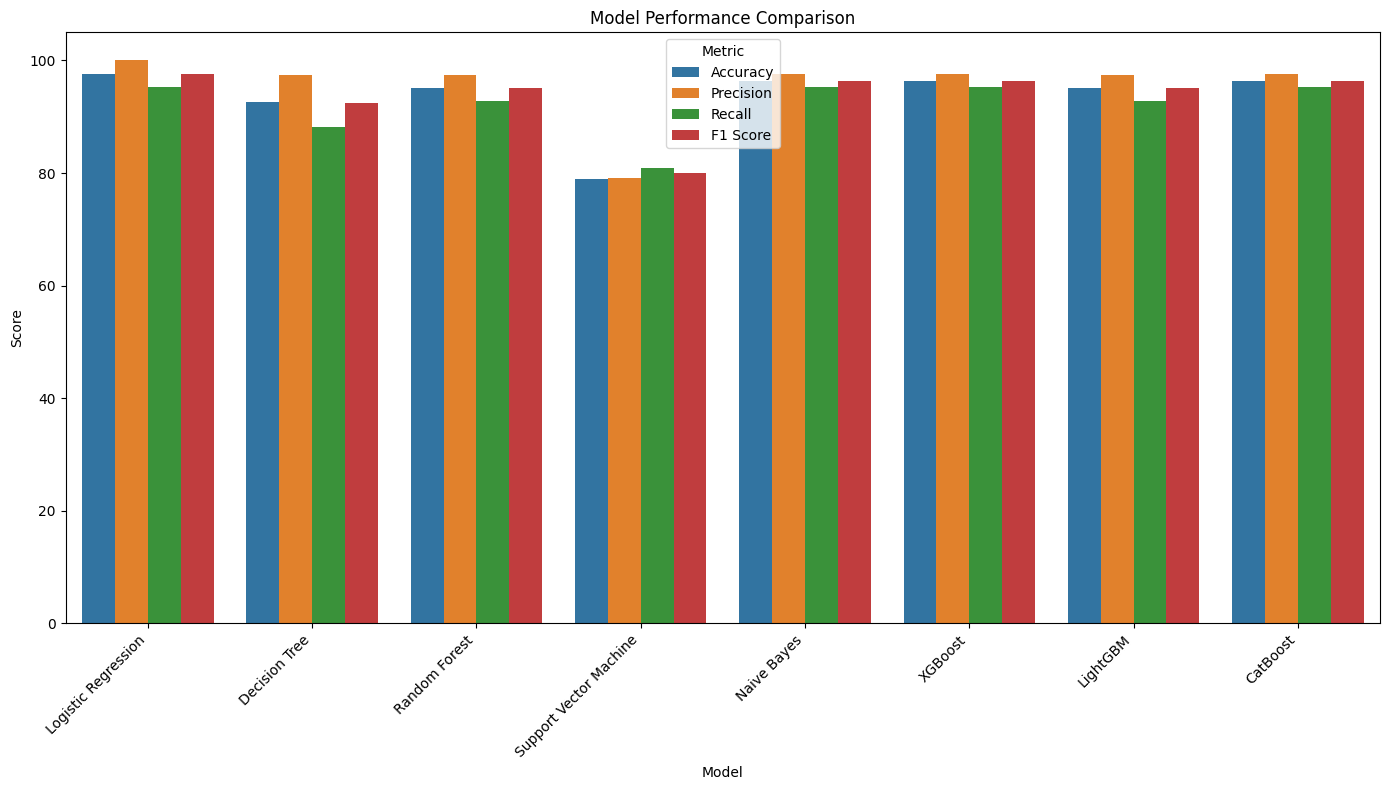

In [ ]:
df_melted = model_evalutions_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')


plt.figure(figsize=(14, 8))
sns.barplot(data=df_melted, x='Model', y='Score', hue='Metric')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 105)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

lr = LogisticRegression(max_iter=1000)

param_grid = {
    'C': [0.1, 1, 10],
    'penalty': ['l2'],
    'solver': ['liblinear']
}


grid_search = GridSearchCV(
    estimator=lr,
    param_grid=param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=1
)


grid_search.fit(train_features, train_targets)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

best_lr = grid_search.best_estimator_
predicted_targets = best_lr.predict(test_features)
print("\nClassification Report:\n", classification_report(test_targets, predicted_targets))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
Best cross-validation score: 0.9465788904379597

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        39
           1       1.00      0.95      0.98        42

    accuracy                           0.98        81
   macro avg       0.98      0.98      0.98        81
weighted avg       0.98      0.98      0.98        81



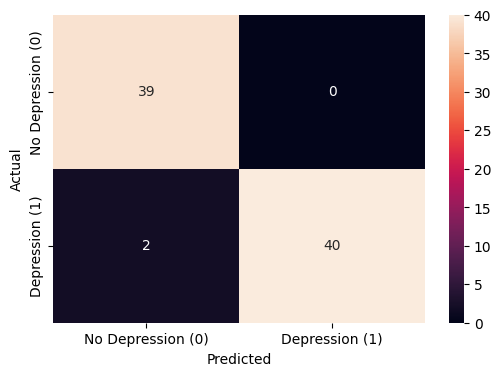

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(test_targets, predicted_targets)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True,
            xticklabels=['No Depression (0)', 'Depression (1)'],
            yticklabels=['No Depression (0)', 'Depression (1)'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
import pickle

with open("best_lr_model.pkl", "wb") as file:
    pickle.dump(best_lr, file)

with open("encoders.pkl", "wb") as file:
    pickle.dump(encoders, file)

NameError: name 'best_lr' is not defined

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import pickle

with open("/content/drive/MyDrive/CI/model/best_lr_model.pkl", "rb") as file:
    model = pickle.load(file)

with open("/content/drive/MyDrive/CI/model/encoders.pkl", "rb") as file:
    encoders = pickle.load(file)


In [ ]:
feature_options = {
    "Gender": {
        "classes": ['Female', 'Male'],
        "encoding": {'Female': 0, 'Male': 1}
    },
    "Age": {
        "note": "Enter your age (e.g., 18–35)"
    },
    "Academic Pressure": {
        "note": "Select a value from 1 to 5 (1 = Very Low, 5 = Very High)"
    },
    "Study Satisfaction": {
        "note": "Select a value from 1 to 5 (1 = Very Dissatisfied, 5 = Very Satisfied)"
    },
    "Sleep Duration": {
        "classes": ['5-6 hours', '7-8 hours', 'Less than 5 hours', 'More than 8 hours'],
        "encoding": {
            '5-6 hours': 0,
            '7-8 hours': 1,
            'Less than 5 hours': 2,
            'More than 8 hours': 3
        }
    },
    "Dietary Habits": {
        "classes": ['Healthy', 'Moderate', 'Unhealthy'],
        "encoding": {
            'Healthy': 0,
            'Moderate': 1,
            'Unhealthy': 2
        }
    },
    "Have you ever had suicidal thoughts ?": {
        "classes": ['No', 'Yes'],
        "encoding": {'No': 0, 'Yes': 1}
    },
    "Study Hours": {
        "note": "Enter the number of hours you study daily (1 to 12)"
    },
    "Financial Stress": {
        "note": "Select a value from 1 to 5 (1 = Very Low, 5 = Very High)"
    },
    "Family History of Mental Illness": {
        "classes": ['No', 'Yes'],
        "encoding": {'No': 0, 'Yes': 1}
    }
}


In [ ]:
def get_user_encoded_input(feature_options):
    user_input = {}

    print("Please provide the following information:\n")

    for feature, data in feature_options.items():
        print(f"\n--- {feature} ---")

        # Case 1: Feature has encoding (categorical)
        if "encoding" in data and data["encoding"] is not None:
            encoding = data["encoding"]
            for label, code in encoding.items():
                print(f"{code}: {label}")

            # Validation loop
            while True:
                try:
                    val = int(input(f"Select the number (encoded value) for '{feature}': "))
                    if val in encoding.values():
                        user_input[feature] = val
                        break
                    else:
                        print("Invalid input. Please enter one of the listed numbers.")
                except ValueError:
                    print("Please enter a valid number.")

        # Case 2: Feature has a note only (numeric input like age or scale)
        elif "note" in data:
            print(data["note"])
            while True:
                try:
                    val = int(input(f"Enter value for '{feature}': "))
                    user_input[feature] = val
                    break
                except ValueError:
                    print("Please enter a valid number.")

    return user_input


In [ ]:
import pandas as pd

user_data = get_user_encoded_input(feature_options)

print("\n✅ Encoded input received:")
print(user_data)

# Create a DataFrame in the correct column order
column_order = [
    'Gender', 'Age', 'Academic Pressure', 'Study Satisfaction',
    'Sleep Duration', 'Dietary Habits',
    'Have you ever had suicidal thoughts ?', 'Study Hours',
    'Financial Stress', 'Family History of Mental Illness'
]

input_df = pd.DataFrame([user_data], columns=column_order)

# Predict
prediction = model.predict(input_df)
prob = model.predict_proba(input_df)

print("\n🎯 Prediction:", prediction[0])
print("📊 Prediction Probabilities:", prob[0] * 100)


Please provide the following information:


--- Gender ---
0: Female
1: Male
Select the number (encoded value) for 'Gender': 0

--- Age ---
Enter your age (e.g., 18–35)
Enter value for 'Age': 11

--- Academic Pressure ---
Select a value from 1 to 5 (1 = Very Low, 5 = Very High)
Enter value for 'Academic Pressure': 5

--- Study Satisfaction ---
Select a value from 1 to 5 (1 = Very Dissatisfied, 5 = Very Satisfied)
Enter value for 'Study Satisfaction': 1

--- Sleep Duration ---
0: 5-6 hours
1: 7-8 hours
2: Less than 5 hours
3: More than 8 hours
Select the number (encoded value) for 'Sleep Duration': 1

--- Dietary Habits ---
0: Healthy
1: Moderate
2: Unhealthy
Select the number (encoded value) for 'Dietary Habits': 0

--- Have you ever had suicidal thoughts ? ---
0: No
1: Yes
Select the number (encoded value) for 'Have you ever had suicidal thoughts ?': 0

--- Study Hours ---
Enter the number of hours you study daily (1 to 12)
Enter value for 'Study Hours': 0

--- Financial Stress ---
Se